# Dollar Bar Data

In view of absence of open-source quant library and other resources. This notebook will cover specifically only how to restructure your HFT data into dollar bar data sample.

Using such data structure could generate good market signal for different plausible quant strategies.

In order to appreciate this technique, I highly recommend you to read the below research.

[Volume Clock SSRN](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2034858)

[Free HFT data generator](https://gist.github.com/boyboi86/5e00faf48f60abfdbe838fbdee269471)

Please remember to save this as your sample data to csv format, otherwise, your result may not be consistant. (This sample data can get you started for 1st 5 chapters)

It is not easy to be motivated because everything within the AFML textbook are considered advance techniques which combines Statistics/ Finance/ Behavioral Economics. Moreover, all the codes I used were written mostly from scratch (proprietary) plus the idea of maintaining a open-source quant library is daunting especially when I am doing everything alone.

I hope by sharing some snippet of codes would provide some assistance to appreciate the mathematical motivation behind what Dr Marcos' work, but more importantly assist in your learning progress.

Contact: boyboi86@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import research as rs

%matplotlib inline

#pls take note of version
#numpy 1.17.3
#pandas 1.0.3
#sklearn 0.21.3

Num of CPU core:  4
Machine info:  Windows-10-10.0.18362-SP0
Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy 1.18.5
Pandas 1.0.4


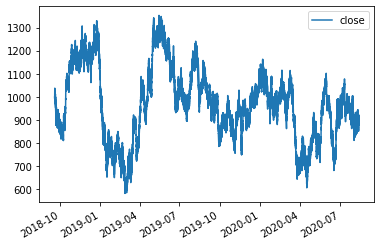

In [2]:
data = rs.create_price_data()

**Note**

The above data was generated based on the function I created.

The gist link is provided above.

Different types of generators are used for different cases studies/ research so make sure you choose the right one.

**Note**

Remember to save the generated data to csv format so that your answers can be consistent.

At the same time, you can run the function multiple times to get a time-series price that are closer to S&P futures price.

It's possible. I tried before.

In [3]:
data # 2 years worth of data on per min basis

,close
2018-09-19 07:45:40.859623,1000.000000
2018-09-19 07:46:40.859623,999.717293
2018-09-19 07:47:40.859623,1000.714961
2018-09-19 07:48:40.859623,1001.134444
2018-09-19 07:49:40.859623,1000.012782
...,...
2020-08-13 18:20:40.859623,898.664142
2020-08-13 18:21:40.859623,899.497674
2020-08-13 18:22:40.859623,900.466753
2020-08-13 18:23:40.859623,900.169978


**Note**

For the purpose of demostration and simplicity, we will assume the "close" price is actually total dollar-volume transacted.

This is an important assumption!

**Note**

The whole idea is that whenever the transacted volume deviates from normal/ expected 10% of daily transacted dollar-volume (Refer to research paper provided). This resampled data will quickly capture such abnormality.

If transaction dollar-volume exceeds expectation (abnormal market behavior), it would reflect in the investors/ traders pouring/ unloading a particular asset hence driving up the prices and vice versa.

**Note**

Try to understand the code snippet then try to read the mathematical equation again. It would make more sense.

In [4]:
def dd_bars(data: pd.DataFrame, m: int = None):
    '''
    params: data => dataframe of close series
    params: column => column of data sample; vol, dollar etc
    '''    
    ts, idx = 0, []
    for i, x in enumerate(data):
        ts += x
        if ts >= m:
            ts = 0; idx.append(i)
            continue
    return data.iloc[idx]

**Note**

The below is the outcome after we resample the data.


In [5]:
tb = dd_bars(data = data.close, m = 1000000) # assuming 10% of daily transacted volme is 1,000,000
tb

2018-09-20 00:10:40.859623    1019.662816
2018-09-20 16:52:40.859623     987.376001
2018-09-21 09:44:40.859623     979.414106
2018-09-22 03:33:40.859623     915.445105
2018-09-22 22:04:40.859623     933.439436
                                 ...     
2020-08-10 10:26:40.859623     905.042048
2020-08-11 04:51:40.859623     935.796206
2020-08-11 23:19:40.859623     893.979698
2020-08-12 18:31:40.859623     879.983382
2020-08-13 13:06:40.859623     902.621534
Name: close, Length: 966, dtype: float64

**Note**

If your realized by now, total data points generated was different after we resample them.

Based on per minute basis, if any abnormal market price bahvior was detected, it would have produce a "buy"/ "sell" signal depending on the type of investment factor (long/short).

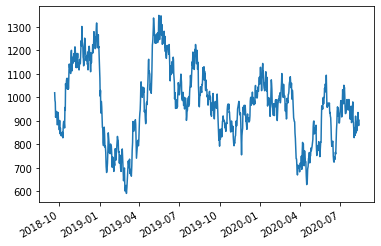

In [6]:
tb.plot()

**Note**

The code snippet is just to assist you to appreciate the mathematical motivation for this technique. 

However, more could be done to improve this algorithm. Feel free to customize them.

**Note**

This algorithm although widely used in index futures/ commodities derivatives is applicable to crypto assets.

In fact, I believe it is well-adapted to crypto-assets since it factors in alot of behaviorial economics element.